In [1]:
### To include packages folder path
import sys, os
sys.path.insert(0, os.path.abspath('') + "/../")

In [2]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from packages import binomial_distribution
import numpy as np
import math
import functools

In [3]:
number_of_observations = 10000
reviews_per_observation = 50
positive_reviews = 48
ob_interval = 1000
headers = ["No. of Observations", "Total Reviews", "Positive Reviews", "Percentage"]
metrics_rows = []
observations = []
for i in range(100, number_of_observations, ob_interval):
    observation = binomial_distribution.generate_events(i, reviews_per_observation) 
    metrics = binomial_distribution.get_metrics(observation, reviews_per_observation, positive_reviews)
    metrics_rows.append(metrics)
    observations.append(observation)
    
binomial_distribution.display_table((headers, metrics_rows))


No. of Observations          Total Reviews          Positive Reviews          Percentage          
100                          50                     48                        39.00%              
1100                         50                     48                        25.82%              
2100                         50                     48                        26.62%              
3100                         50                     48                        27.97%              
4100                         50                     48                        26.05%              
5100                         50                     48                        25.63%              
6100                         50                     48                        26.61%              
7100                         50                     48                        26.93%              
8100                         50                     48                        26.54%              
9100      

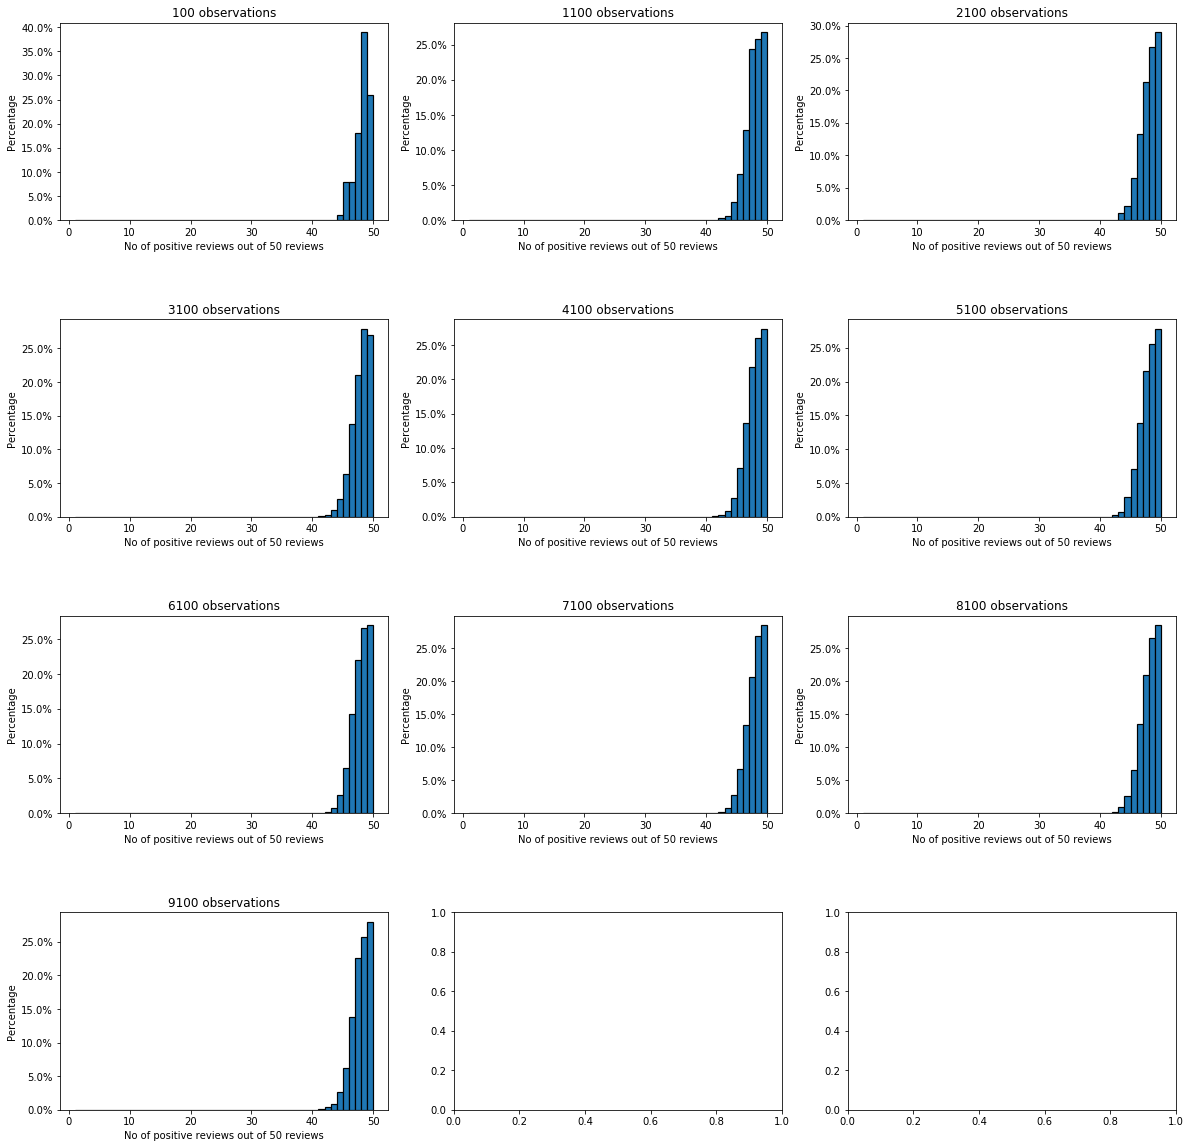

In [4]:
binomial_distribution.plot_hist(observations, reviews_per_observation)    